In [1]:
#import dem modules
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

In [37]:
# 1. read in the yelp dataset
yelp=pd.read_csv('~/GA/SF_DAT_15/hw/optional/yelp.csv', na_filter=False)

In [3]:
yelp.columns

Index([u'business_id', u'date', u'review_id', u'stars', u'text', u'type',
       u'user_id', u'cool', u'useful', u'funny'],
      dtype='object')

In [38]:
yelp['total_compliments']=yelp['cool']+yelp['useful']+yelp['funny']

In [5]:
yelp.columns

Index([u'business_id', u'date', u'review_id', u'stars', u'text', u'type',
       u'user_id', u'cool', u'useful', u'funny', u'total_compliments'],
      dtype='object')

In [6]:
yelp.shape

(10000, 11)

In [7]:
yelp.sort_index(by=['total_compliments'], ascending=[False])

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,total_compliments
4957,gqLWBFxOKag8dXwVxEvTrg,2011-10-03,1kc50TqtMsIHDGR8yQgF8g,5,Love this place! Amazing Happy Hour Specials!!,review,73eZuIuXVD5sif7GrIMfuQ,77,76,0,153
9634,1NZLxU5WvB5roPFzneAlLw,2008-09-19,nQHI2kQElYrMWrPBqdwE4w,4,Scary things to me:\r\nParis Hilton has a care...,review,C8ZTiwa7qWoPSMIivTeSfw,38,38,57,133
180,pfTwzep_4hRTX_jXoi38cw,2008-05-27,RqwFPp_qPu-1h87pGBAM8w,5,Hippies scare me. So in my preparation to ...,review,sEWeeq41k4ohBz4jS_iGRw,28,28,39,95
9843,WS1z1OAR0tRl4FsjdTGUFQ,2010-07-12,fD2_M3N0Ojx7d1LZ4lNSMA,5,"As far as I know, I'm the only person in this ...",review,MWt24-6bfv_OHLKhwMQ0Tw,32,30,20,82
6495,l0S5b8YYyDbjttTWtKc-gg,2012-06-20,ZpkGGIcD1zX5Pc4p4c93fA,5,Why'd the chicken cross the road?\r\nTo get to...,review,cRyNICH0mhjxagvSyVr60Q,27,31,24,82
556,V9i9LnTg9H2XvzqCVBSOXg,2009-05-09,YAXPKM-Hck6-mjF74Zy9tA,4,"Tandoori Times\r\n\r\nVolume 1, Issue 1, Numbe...",review,P2kVk4cIWyK4e4h14RhK-Q,22,23,27,72
778,AqbgC7Gul5Es1rRzGNLDFA,2008-06-10,WRBYytJAaJI1BTQG5VI8oQ,1,Yeah...notsomuch.\r\n\r\nSprinkles is sooooooo...,review,g84VjttN28PWiv_WtdhnSQ,17,20,30,67
9283,hW0Ne_HTHEAgGF1rAdmR-g,2011-01-29,rIgBv_LEXYcFRZf0NQcKKw,3,"In the age old debate of length v. girth, Sky ...",review,J3rNWRLRuZJ_0xsJalIhlA,16,19,24,59
3753,K8pM6qQdYu5h6buRE1-_sw,2009-09-22,OW2Pj5-ExHxuFoCQtRfIsw,5,I have had chicken. I have had waffles. And no...,review,yNVGe_z9hHxbvpa2Ns2JIg,19,17,23,59
4637,rQ4z0EStSZE4acgkne6Hmg,2009-01-28,PWvLDC7tQWRoajYKcAqrxQ,5,I really enjoy this place. It's beautifully de...,review,sEWeeq41k4ohBz4jS_iGRw,23,24,11,58


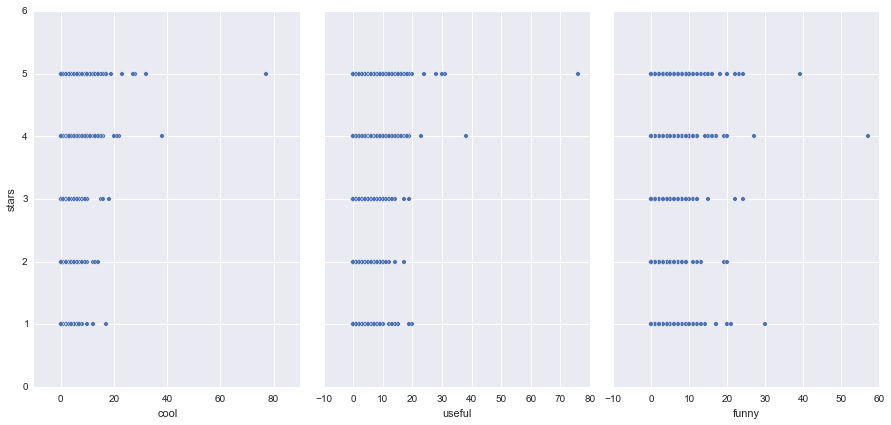

In [8]:
sns.pairplot(yelp, x_vars=['cool','useful','funny'], y_vars='stars', size=6, aspect=0.7)

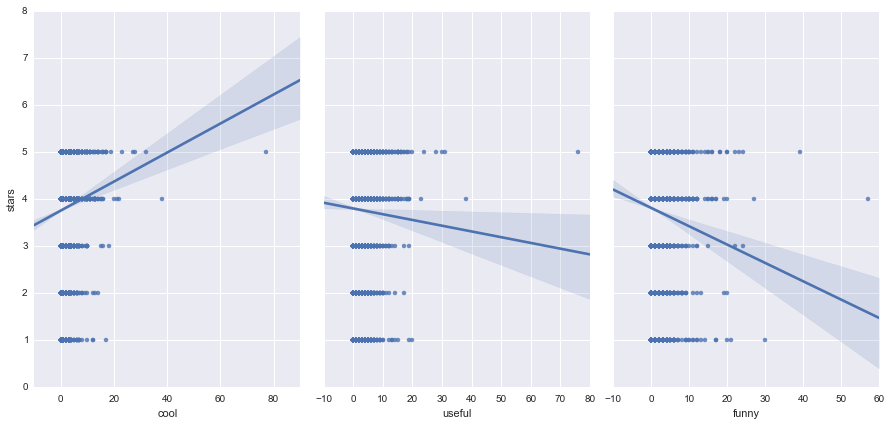

In [9]:
sns.pairplot(yelp, x_vars=['cool','useful','funny'], y_vars='stars', size=6, aspect=0.7, kind='reg')

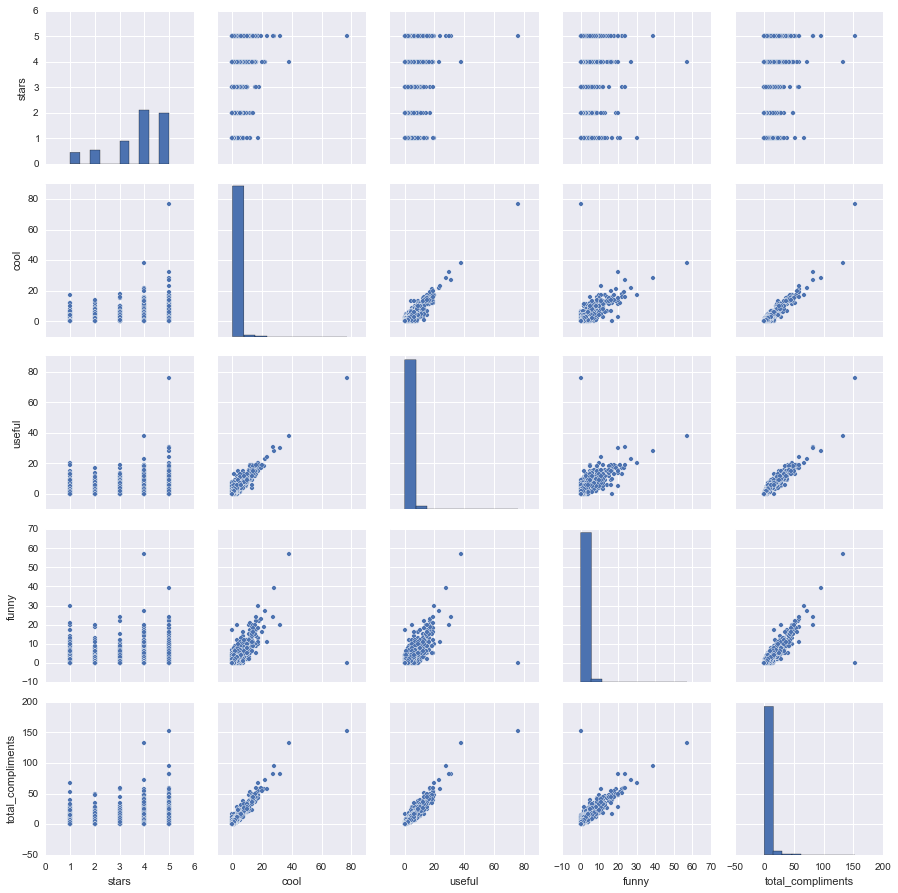

In [10]:
sns.pairplot(yelp)

In [45]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test \
= train_test_split(yelp[['cool','useful','funny']], yelp['stars'], random_state=1)

In [46]:
# 2. Perform a linear regression using 
# "stars" as your response and 
# "cool", "useful", and "funny" as predictors
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
#X=yelp[['cool','useful','funny']]
#y=yelp['stars']
linreg.fit(x_train, y_train)
print linreg.intercept_
print linreg.coef_
#zip(features_train, linreg.coef_[0])

3.84331825898
[ 0.26345775 -0.14715363 -0.1282926 ]


In [26]:
# 3. Show your MAE, R_Squared and RMSE

In [51]:
#def train_test_rmse(X, y):
    #X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    #linreg = LinearRegression()
    #linreg.fit(X_train, y_train)
y_pred = linreg.predict(x_test) 
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1.184290528216591

In [52]:
#def train_test_mae(X, y):
#    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
#    linreg = LinearRegression()
#    linreg.fit(X_train, y_train)
#    y_pred = linreg.predict(X_test)
#    return 
metrics.mean_absolute_error(y_test, y_pred)

0.94710049077326819

In [15]:
#X=yelp[['cool','useful','funny']]
#train_test_rmse(X, y)

1.184290528216591

In [16]:
#train_test_mae(X, y)

0.94710049077326819

In [53]:
lm = smf.ols(formula='stars ~ cool + useful + funny', data=yelp).fit()
lm.rsquared

0.044272856242001724

In [54]:
# 4. Use statsmodels to show your pvalues
# for each of the three predictors
# Using a .05 confidence level, 
# Should we eliminate any of the three?
print lm.pvalues

Intercept    0.000000e+00
cool         2.988197e-90
useful       1.206207e-39
funny        1.850674e-43
dtype: float64


In [55]:
yelp['good_rating']='False'

In [20]:
####IGNORE JUST NOTES####

# Set a default value
#df['Age_Group'] = '<40'
# Set Age_Group value for all row indexes which Age are greater than 40
#df['Age_Group'][df['Age'] > 40] = '>40'
# Set Age_Group value for all row indexes which Age are greater than 18 and < 40
#df['Age_Group'][(df['Age'] > 18) & (df['Age'] < 40)] = '>18'
# Set Age_Group value for all row indexes which Age are less than 18
#df['Age_Group'][df['Age'] < 18] = '<18'

#alldata_balance = alldata[(alldata[IBRD] !=0) | (alldata[IMF] !=0)]

#df["desired"] = df["data"] > 2.5

#y_category = np.where(y > 7, 1, 0)

In [56]:
# 5. Create a new column called "good_rating"
# this could column should be True iff stars is 4 or 5
# and False iff stars is below 4
yelp['good_rating']=(yelp['stars']==4)|(yelp['stars']==5)

In [22]:
yelp.good_rating.value_counts()

True     6863
False    3137
dtype: int64

In [23]:
yelp.type.describe()

count      10000
unique         1
top       review
freq       10000
Name: type, dtype: object

In [60]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test \
= train_test_split(yelp[['cool','useful','funny']], yelp['good_rating'], random_state=1)

In [61]:
# 6. Perform a Logistic Regression using 
# "good_rating" as your response and the same
# three predictors
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
#X=yelp[['cool','useful','funny']]
#y=yelp['good_rating']
logreg.fit(x_train, y_train)
assorted_pred_class = logreg.predict(x_test)

In [63]:
zip(x_train, logreg.coef_[0])

[(array([0, 0, 0]), 0.61190210342833429),
 (array([0, 0, 0]), -0.21459527794027927),
 (array([3, 2, 3]), -0.36438740205816544)]

In [64]:
# 7. Show your Accuracy, Sensitivity, Specificity
# and Confusion Matrix
#from sklearn import metrics
#preds = logreg.predict(X_test)
confusion=metrics.confusion_matrix(y_test, assorted_pred_class)
print confusion

[[  51  733]
 [  38 1678]]


In [77]:
#accuracy
((1.0*confusion[0][0])+confusion[1][0])/(confusion[0][0]+confusion[0][1]+confusion[1][0]+confusion[1][1])

0.0356

In [66]:
#sensitivity
1.0*confusion[1][1]/(confusion[1][0]+confusion[1][1])

0.9778554778554779

In [76]:
#specificity
1.0*confusion[0][0]/(confusion[0][0]+confusion[1][0])

0.5730337078651685

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122bfa410>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1250c1850>]], dtype=object)

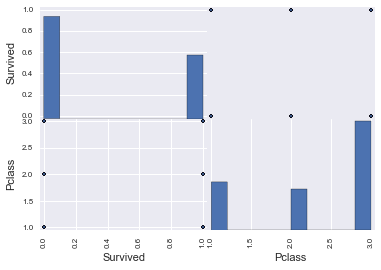

In [216]:
#plotting just for fun
from pandas.tools.plotting import scatter_matrix

scatter_matrix(titanic[['Survived', 'Pclass']])

ValueError: x and y must be the same size

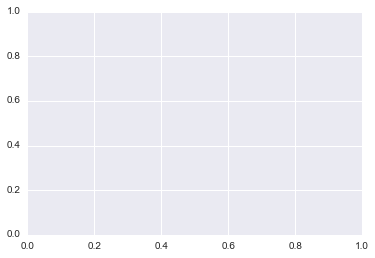

In [197]:
#plotting just for fun
#it's because x is 2D while and y is 1D
#x and y must be the same size
plt.scatter(X, y)
plt.plot(y, assorted_pred_class, color='red')

In [ ]:
#8. Perform one NEW operation of your choosing to try to boost your metrics!

<h8><B>PART 2: titanic</H8></B>

In [87]:
# 1. Read in the titanic data set.
titanic=pd.read_csv('~/GA/SF_DAT_15/data/titanic.csv', na_filter=False)

In [88]:
titanic.Age=titanic.Age.convert_objects(convert_numeric=True)

In [82]:
# 2. Create a new column called "wife" that is True
# if the name of the person contains Mrs.
# AND their SibSp is at least 1
titanic['wife']=(titanic['Name'].str.contains('Mrs.'))&(titanic['SibSp']>0)

In [177]:
titanic.describe()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,wife
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891
mean,446.000000,0.383838,2.308642,0.523008,0.381594,32.204208,0.09090909
std,257.353842,0.486592,0.836071,1.102743,0.806057,49.693429,0.2876412
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,False
25%,223.500000,0.000000,2.000000,0.000000,0.000000,7.910400,0
50%,446.000000,0.000000,3.000000,0.000000,0.000000,14.454200,0
75%,668.500000,1.000000,3.000000,1.000000,0.000000,31.000000,0
max,891.000000,1.000000,3.000000,8.000000,6.000000,512.329200,True


In [90]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C


In [91]:
# 3. What is the average age of a male and
# the averaage age of a female on board?
titanic[(titanic.Age > 0)].groupby('Sex').Age.mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [92]:
# 4. Fill in missing MALE age values with the
# average age of the remaining MALE ages
titanic['Age'] = titanic.groupby("Sex").transform(lambda x: x.fillna(x.mean()))['Age']
#titanic.Age.fillna(titanic.Age.mean(), inplace=True)

In [93]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,,S
5,6,0,3,"Moran, Mr. James",male,30.726645,0,0,330877,8.4583,,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,,C


In [ ]:
# 5. Fill in missing FEMALE age values with the
# average age of the remaining FEMALE ages

In [94]:
titanic[(titanic.Age > 0)].groupby('Sex').Age.mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [167]:
#titanic.Age=titanic.Age.apply(lambda x: x.strip())

In [175]:
titanic.Age.isnull().sum()

0

In [192]:
# 6. Perform a Logistic Regression using
# Survived as your response and age, wife
# as predictors
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
X=titanic[['Age','wife']]
y=titanic['Survived']
logreg.fit(X, y)
assorted_pred_class = logreg.predict(X)

In [193]:
# 7. Show Accuracy, Sensitivity, Specificity and 
# Confusion matrix
from sklearn import metrics
preds = logreg.predict(X)
print metrics.confusion_matrix(y, preds)

[[531  18]
 [279  63]]


In [ ]:
# 8. now use ANY of your variables as predictors
# Still using survived as a response to boost metrics!

In [ ]:
# 9. Show Accuracy, Sensitivity, Specificity